## Libraries ##

In [1]:
import re
import math
import string
import numpy as np
import pandas as pd
from scipy import interp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA, SparsePCA
from sklearn.decomposition import PCA

import xgboost
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
# from imblearn.over_sampling import SMOTE

from matplotlib import pyplot
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Function for computing scores and graphs ##

In [2]:
def scores(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_proba = classifier.predict_proba(X_test)
    predictions_proba = predictions_proba[:, 1]
    
    fp, tp, threshold = roc_curve(y_test, predictions_proba)
    precision_position, recall_position, _ = precision_recall_curve(y_test, predictions_proba)
    
    accuracy  = round(accuracy_score(y_test, predictions) * 100, 4)
    auc       = round(roc_auc_score(y_test, predictions_proba) * 100, 4)
    aupr      = round(average_precision_score(y_test, predictions_proba) * 100, 4)
    precision = round(precision_score(y_test, predictions, average='binary') * 100, 4)
    recall    = round(recall_score(y_test, predictions, average='binary') * 100, 4)
    f1        = round(f1_score(y_test, predictions, average='binary') * 100, 4)
    mcc       = round(matthews_corrcoef(y_test, predictions) * 100, 4)
        
    return accuracy, auc, aupr, precision, recall, f1, mcc, fp, tp, y_test, predictions_proba

# Function for computing independent test set ##

In [3]:
def independent_test_scores(classifier, X_test, y_test):
    predictions = classifier.predict(X_test)
    predictions_proba = classifier.predict_proba(X_test)
    predictions_proba = predictions_proba[:, 1]
    
    fp, tp, threshold = roc_curve(y_test, predictions_proba)
    precision_position, recall_position, _ = precision_recall_curve(y_test, predictions_proba)
    
    accuracy  = round(accuracy_score(y_test, predictions) * 100, 4)
    auc       = round(roc_auc_score(y_test, predictions_proba) * 100, 4)
    aupr      = round(average_precision_score(y_test, predictions_proba) * 100, 4)
    precision = round(precision_score(y_test, predictions, average='binary') * 100, 4)
    recall    = round(recall_score(y_test, predictions, average='binary') * 100, 4)
    f1        = round(f1_score(y_test, predictions, average='binary') * 100, 4)
    mcc       = round(matthews_corrcoef(y_test, predictions) * 100, 4)
        
    return accuracy, auc, aupr, precision, recall, f1, mcc, fp, tp, y_test, predictions_proba

## Loading the feature generated dataset ##

In [4]:
df = pd.read_csv("Dataset.csv")
df.head()

,Predictions,30_mer_Sequence,Percent_Peptide,Amino_Acid_Cut_Position,Index0_A,Index1_A,Index2_A,Index3_A,Index4_A,Index5_A,...,TTTC_Count,TTTG_Count,TTTT_Count,MFE,RNA_compound,SSPred,MEAEquivalent,RNA_coFold,GC_Content,GC_Content_10
0,0.544412,CAGAAAAAAAAACACTGCAACAAGAGGGTA,72.87,360.0,0,1,0,1,1,1,...,0,0,0,-0.3,-0.3,-0.0,3.992071,-0.3,0.37,1
1,0.617512,TTTTAAAAAACCTACCGTAAACTCGGGTCA,65.80,1868.0,0,0,0,0,1,1,...,0,0,1,-3.5,-3.5,-4.0,1.518208,-3.5,0.37,1
2,0.476232,TCAGAAAAAGCAGCGTCAGTGGATTGGCCC,84.21,416.0,0,0,1,0,1,1,...,0,0,0,-2.3,-2.3,-2.0,3.209457,-2.3,0.53,1
3,0.459882,AATAAAAAATAGGATTCCCAGCTTTGGAAG,56.39,1601.0,1,1,0,1,1,1,...,0,1,0,-1.8,-1.8,-2.0,3.973759,-1.8,0.33,0
4,0.290841,GATGAAAAATATGTAAACAGCATTTGGGAC,4.30,33.0,0,1,0,0,1,1,...,0,1,0,-0.5,-0.5,-2.0,3.358502,-0.5,0.33,0


## Data preprocessing - scaling the data of selected features between 0 - 1 ##

In [5]:
X = df.iloc[0:, 2:4]
df.iloc[0:, 2:4] = MinMaxScaler().fit_transform(X)
X = np.array(df.iloc[0:, 9632]).reshape(-1, 1)
df.iloc[0:, 9632] = MinMaxScaler().fit_transform(X)
X = np.array(df.iloc[0:, 9633]).reshape(-1, 1)
df.iloc[0:, 9633] = MinMaxScaler().fit_transform(X)
X = np.array(df.iloc[0:, 9634]).reshape(-1, 1)
df.iloc[0:, 9634] = MinMaxScaler().fit_transform(X)
X = np.array(df.iloc[0:, 9635]).reshape(-1, 1)
df.iloc[0:, 9635] = MinMaxScaler().fit_transform(X)
X = np.array(df.iloc[0:, 9636]).reshape(-1, 1)
df.iloc[0:, 9636] = MinMaxScaler().fit_transform(X)
df.head()

,Predictions,30_mer_Sequence,Percent_Peptide,Amino_Acid_Cut_Position,Index0_A,Index1_A,Index2_A,Index3_A,Index4_A,Index5_A,...,TTTC_Count,TTTG_Count,TTTT_Count,MFE,RNA_compound,SSPred,MEAEquivalent,RNA_coFold,GC_Content,GC_Content_10
0,0.544412,CAGAAAAAAAAACACTGCAACAAGAGGGTA,0.721347,0.127080,0,1,0,1,1,1,...,0,0,0,0.983425,0.983425,1.000000,0.322372,0.983425,0.37,1
1,0.617512,TTTTAAAAAACCTACCGTAAACTCGGGTCA,0.651313,0.660885,0,0,0,0,1,1,...,0,0,1,0.806630,0.806630,0.777778,0.121201,0.806630,0.37,1
2,0.476232,TCAGAAAAAGCAGCGTCAGTGGATTGGCCC,0.833680,0.146903,0,0,1,0,1,1,...,0,0,0,0.872928,0.872928,0.888889,0.258731,0.872928,0.53,1
3,0.459882,AATAAAAAATAGGATTCCCAGCTTTGGAAG,0.558098,0.566372,1,1,0,1,1,1,...,0,1,0,0.900552,0.900552,0.888889,0.320883,0.900552,0.33,0
4,0.290841,GATGAAAAATATGTAAACAGCATTTGGGAC,0.042100,0.011327,0,1,0,0,1,1,...,0,1,0,0.972376,0.972376,0.888889,0.270851,0.972376,0.33,0


## Diving dataset into X and y ##

In [6]:
X = df.iloc[0:, 2:]
y = df.iloc[0:, 0]

# Train Index List and Test Index List (Test Size = 10%)

In [7]:
train = [3787,1477,1020,4095,3975,994,842,2305,4802,5180,1454,4955,1412,2873,308,4886,624,2575,4402,3200,2236,3150,1115,3119,2259,1200,4835,2053,1421,1188,2846,1128,3799,952,1223,856,438,696,584,3839,2342,149,4977,437,12,93,3674,2228,705,2276,4071,805,1212,2292,642,1101,734,1561,1370,2380,2370,4265,429,848,4017,4379,2167,2024,3305,3282,2005,1094,2347,3961,3447,2715,2651,2225,4985,4531,287,3527,2456,1780,3828,561,4003,1879,3929,798,3159,3792,4275,4960,5210,1509,3048,1730,5265,4351,4720,2072,4078,4728,2627,5072,4870,2741,1498,751,2080,1583,1665,1751,1411,5145,414,3666,3820,2339,3313,3402,4354,2995,252,3614,654,350,4302,877,457,2531,4817,90,5005,5289,3442,26,549,181,2517,3700,2121,2384,2077,2742,1803,776,4366,4579,3088,4934,3161,5146,4655,1897,3112,69,2394,3095,3788,5217,926,2647,203,3349,339,1361,387,2523,4946,4098,4345,4288,2373,810,3949,3132,221,677,2462,4332,4498,2723,4475,1095,2464,4382,2855,4816,177,4266,2905,2833,1345,3905,3714,931,1746,1942,2943,3107,1593,4635,4050,2399,527,3694,1564,881,2099,681,794,5042,2091,4865,2104,2181,2973,2369,2552,219,3153,1557,582,4706,4310,43,4727,210,3433,354,2827,3947,1055,4252,3070,367,2592,4661,1891,135,4397,47,718,1074,1244,2917,4857,670,3106,5275,1044,61,1860,4073,95,1736,478,121,2892,4633,1744,1543,3708,1360,1032,693,1513,322,1400,2209,3661,2662,2499,4393,2093,1503,5011,1419,1658,3914,731,334,291,184,4640,2857,4702,533,1894,1623,1886,4011,1334,5284,657,3323,5074,4567,2726,2057,2810,428,1235,4333,2022,5014,3078,1617,1553,3100,4725,977,2685,1702,3235,4513,1961,4726,1732,3245,3227,1041,1126,4808,5308,879,4139,1424,3360,5193,1073,764,4462,1554,1448,2525,4284,1292,4764,2170,102,1321,1966,4399,5158,3338,1533,2303,2497,70,1176,1391,4489,2364,2311,4166,831,1268,4990,1374,3575,969,1456,896,4880,1745,2302,4512,3652,4100,4815,4370,3405,1215,1672,1534,4409,3617,5173,4441,2673,5182,381,1747,4851,3682,4377,5261,3491,4454,2117,1322,4065,3801,233,712,3844,4849,3481,633,4543,415,3722,2605,4892,4950,3931,757,3076,605,17,4621,2344,2463,3800,596,1832,4949,4446,1867,3613,1741,2101,371,2655,2687,652,598,676,238,3848,3933,1197,3650,5206,2968,1025,5096,75,1626,4527,3917,3513,3837,3109,1297,1231,3689,1773,4519,3827,828,1972,4860,96,2409,4915,2721,1467,1743,621,2594,4651,4210,566,1813,4074,1487,748,1476,3815,51,889,1822,2998,2954,1616,534,745,3601,2052,443,1210,195,4582,2602,3014,802,3252,5268,3396,4683,3790,3825,3908,4287,1323,1181,644,1514,3886,120,2312,1839,4597,4278,2186,2765,4209,2570,134,3578,1965,511,62,4986,1330,1338,2939,122,5250,3253,2882,4394,567,1921,3603,864,3967,5099,1840,2481,720,3058,2288,2714,602,1220,3208,2767,4235,4447,3906,318,274,4580,1183,1632,1260,2138,4713,5125,295,1890,3268,298,68,3238,3489,1319,150,756,4966,4663,1335,2233,1406,376,5204,859,3210,4954,378,1807,4229,2847,3410,2826,841,2029,175,3555,927,2591,45,1096,4414,4253,5199,1650,4866,2378,283,2495,1877,2585,2098,2457,1295,1864,2414,4781,1580,2518,3038,3870,1666,4842,257,3732,5092,99,4878,1849,3114,1272,3679,1881,366,2333,3469,4122,2865,949,1934,19,1630,668,218,2881,2187,3716,3881,3121,2516,777,2235,1018,2929,1618,3438,517,5067,2580,2164,5100,2659,2316,4844,2656,2389,1052,1425,759,3010,5298,214,2388,4328,1907,4294,3591,1538,196,4031,5215,4075,1056,1837,887,1657,3765,2803,568,4010,2890,2794,139,1504,1149,3488,4497,2577,463,2629,4471,594,3318,450,3656,2834,2862,2987,1480,1520,1174,5012,451,4476,3372,3303,3651,4187,4974,999,3311,2240,192,4623,4787,4443,3895,4967,4704,4163,2885,2226,4660,3921,4456,1669,3000,3355,368,1892,1992,2549,2836,5222,191,1815,108,3543,2671,3780,3680,2242,2480,1468,3047,476,4700,4037,312,5301,166,1983,2002,1024,1221,1770,3240,4784,1765,4984,1536,3334,2157,4746,1988,1541,2223,4916,152,5084,2859,4981,4290,1818,1436,5053,3231,1344,5121,4836,1945,31,1225,937,4941,752,3557,309,2771,4035,3882,2372,495,3434,205,1135,3013,3795,701,305,1192,4194,4231,1061,843,3142,2543,211,1108,4148,679,565,5030,4044,680,180,5138,1501,2614,4541,278,4216,3101,1204,1578,432,289,1027,535,3878,1187,188,2646,5162,4239,706,3697,270,4584,4634,3023,4135,111,1170,5018,220,4410,627,2224,3794,5040,790,5171,461,4680,551,4263,1427,1703,198,2921,2555,402,5141,2607,5061,2284,2067,4743,650,4259,708,4400,4693,1782,4043,1216,5277,3404,314,4547,5307,4755,113,960,4574,2550,2698,3753,5309,1957,3997,1788,3862,4811,4463,2154,2218,4831,326,604,4453,3413,5101,4605,4913,2822,1634,3229,1859,4406,1760,2092,2620,789,3487,1550,4246,871,5071,5133,5047,2153,73,420,1752,1786,3406,92,4858,4589,2533,3258,4019,2100,494,1375,3544,4181,2422,1164,2111,1270,3116,4822,5207,2694,618,4561,4309,124,2078,3384,5036,1878,4144,2328,3858,869,3066,1042,3017,356,1162,4036,3123,3407,4554,1919,4919,5167,4549,4109,3193,5110,332,1599,3090,1995,1258,4576,1451,4207,1116,4906,4016,2841,4834,3691,1694,445,2535,2837,1413,452,3467,4714,3337,14,4174,945,247,4517,360,4945,4975,3866,2600,1586,3585,4524,3361,3946,2450,5188,3220,490,3877,862,1006,4161,1383,2191,2763,2927,1362,3618,506,1417,3365,25,2642,5266,1222,2251,1113,4618,5039,3871,1670,4964,3353,433,2321,3570,3199,2732,3001,4625,2815,3145,4304,1102,2559,2992,2406,4221,156,3366,194,615,643,2916,3518,1068,1808,5045,3712,5243,4505,3276,330,3154,4130,2527,622,3647,4102,3867,3277,4490,2683,4291,4307,755,518,4296,32,3316,4189,2856,1157,1738,744,1729,4509,2997,4347,4766,783,3196,2829,229,857,2974,1401,2663,408,170,540,1723,4172,4257,3803,613,2346,4435,3887,1161,2314,3298,2280,3225,2004,1609,3861,4896,564,4034,5216,2142,1820,4599,1700,4803,5234,4692,3951,2515,2441,2699,2805,5130,1172,4545,325,1051,3326,5083,3260,1789,4502,1196,620,1691,4889,1482,1189,328,648,1862,897,1817,1123,5060,4930,4552,1726,3002,2217,1779,3912,2416,2874,1519,2900,1874,3703,1023,4710,2937,3503,4864,4420,3320,809,3386,1675,978,5306,1629,3035,430,4876,2812,3752,2638,2867,4649,2776,2753,174,2705,4419,3254,4742,217,4722,1721,4151,1444,690,2115,4127,2521,2526,1106,2447,818,4450,611,3248,3667,1697,136,2025,2572,576,2317,3026,4716,1180,888,3541,324,4528,817,3704,2182,208,293,4006,1119,2498,4059,1264,990,2569,1614,3204,1739,4460,4536,1662,353,4320,4020,1844,1654,5015,1489,2883,3213,3450,1228,259,2622,2981,5035,4510,2868,52,4957,411,4149,4245,3148,2643,2910,2436,1479,1507,1033,1097,1469,543,1046,2952,1954,30,725,2748,5296,4125,5230,1426,2059,2818,436,2291,5189,912,4486,2215,1588,5303,4794,2755,4445,1590,3999,1971,1238,903,2127,3559,3125,507,4586,183,2118,1497,449,321,1211,4066,5081,2119,1769,4214,2133,3767,2172,2377,1551,4718,1146,3126,2877,44,1313,2018,1893,2728,3044,3771,1378,2387,3409,413,4999,1407,941,801,1288,1558,2458,4676,4546,4801,1699,256,4901,5211,1151,2598,647,1767,3285,4430,2086,2194,2083,24,1315,1088,2252,2784,3873,1350,3658,112,3547,263,1393,4689,1186,4827,5028,56,1309,695,4466,4479,2658,2780,1227,276,2107,319,1833,3918,1589,1858,682,2488,3692,3634,479,3964,3221,286,2760,3425,3307,2727,4133,2094,3956,2486,1598,2146,5113,3868,736,2222,336,1872,5200,3129,3392,3670,5069,1071,2586,2124,4201,3773,2173,3492,4374,81,4381,3809,1714,1488,1777,498,4615,3475,2886,1946,4099,3299,3439,4093,4128,1610,4871,2574,4195,2940,1022,3214,5190,2264,4168,3504,2282,665,5103,5001,1552,5144,2437,1017,557,3968,2706,1207,2275,3571,2402,1510,3727,2439,1684,245,1163,4262,5183,3246,266,3910,4828,1114,63,2337,1909,2924,4342,3113,3408,3482,2845,1876,3480,4040,4255,2063,4072,1784,1237,103,1873,2348,2980,272,508,4588,5239,5283,908,1303,3592,1627,1522,835,358,138,299,1556,1003,382,4765,761,2876,2341,2478,4303,1402,2304,4573,1932,2299,4241,2244,4566,58,76,796,4436,785,3034,5212,4885,2670,4110,910,2804,5085,1257,3935,3388,1178,3922,442,3243,2440,2619,5159,3919,2114,4069,2417,3707,3485,3403,2678,3437,1502,2471,3064,2011,3973,3321,4292,3955,6,678,1943,3331,4894,2722,4087,3378,5172,1064,2977,1474,4540,4250,2751,2021,4604,4940,2819,1130,1461,4812,2688,4595,222,4927,48,573,1236,4005,4086,4778,267,1104,1935,386,3737,4867,4281,4657,1563,4412,209,909,1289,3950,3071,1842,4353,4457,958,1793,2088,331,2654,3096,4701,1774,2680,3605,4322,2277,3431,2229,4989,4032,1366,173,5102,3764,2298,4641,1952,2899,2036,3807,3728,4152,0,2174,1356,3838,2522,5273,396,3911,3134,1812,2879,4371,816,1572,3352,1800,4211,4082,2609,4594,3077,2750,3542,3418,5142,554,1159,1213,5031,5294,3940,3169,700,4337,3471,3740,1455,4458,3536,3655,866,1644,3593,3187,3957,1490,2451,729,3065,3865,1936,1110,4325,4935,1185,2007,193,1515,578,2123,1429,4058,5259,1846,131,178,4747,3209,3456,3105,2962,2073,658,1896,3846,2221,5126,342,4814,727,5186,976,2505,3364,1928,4882,3662,1299,3381,4883,660,1790,2700,3657,3362,3927,3576,3050,5241,3829,1278,3473,1621,3411,3194,67,5155,2991,2269,4198,820,1226,3383,4451,2842,3098,4738,4537,3786,1143,397,4558,4577,3699,1398,1659,2220,979,1298,3460,82,3857,5129,4160,4190,2584,423,4609,1904,4821,3907,4731,1565,3793,839,500,141,1377,4137,2266,3888,1138,4147,4695,1787,2895,550,3509,2019,948,2554,2476,532,3062,1829,3295,4697,4238,1602,2238,639,5132,967,4503,2960,1683,2248,4751,2641,155,2295,3074,3203,1089,4786,2319,4506,288,930,2860,2689,3084,4824,3814,2669,3996,942,2354,4228,4953,1698,5002,3339,3370,3678,3470,985,3130,4644,2512,5075,981,2813,2758,4258,3322,3985,5160,4222,1457,1395,264,2702,929,3463,5221,3941,2178,4650,246,4982,1758,5166,4504,923,2644,268,669,3089,1910,3375,1152,5187,3904,4507,1781,2413,2307,2445,3371,1915,612,4335,2267,3988,1898,1649,3725,258,3757,847,4888,4518,1233,1127,3085,1967,558,904,484,2211,1320,2653,7,2315,3706,3607,1450,1201,2426,1814,773,2274,1011,3181,2764,1991,1277,1783,3516,446,880,4740,781,1749,3834,2932,2423,5184,4591,883,3319,1091,3939,3317,531,4083,2438,4316,3755,4358,2290,1727,610,570,3011,3426,343,4685,3554,434,1903,97,3263,2069,1537,2792,4672,1517,965,4684,528,176,2470,3937,3033,5037,572,2596,3965,4418,2778,2374,3632,3986,2208,2894,2492,3954,383,852,1880,370,4254,5131,4593,1105,2902,2361,4279,1336,2189,4877,3774,2617,3758,3552,5148,1171,2925,3039,1422,2640,2988,4417,1464,874,2297,2623,4610,1251,2648,840,4217,581,204,1641,2014,905,631,3501,1974,162,3589,3784,4952,2801,617,875,1431,547,3768,4829,4487,2692,4386,3274,4340,1861,640,3435,637,4847,3909,2308,4313,2096,4041,3479,1372,3206,921,546,1449,2610,
         1900,2028,2301,1885,1642,3966,5108,2097,4628,4025,4776,5274,836,601,2184,4232,2802,4575,1582,4534,2858,3075,1070,1775,5107,1283,4270,3702,5050,1836,4508,1019,3626,1326,475,3897,1651,4951,4553,2528,2944,4570,2915,1373,739,4173,2754,867,1140,997,1337,541,1099,1132,5152,3063,2258,4299,59,3256,1938,2908,5242,2704,4758,1078,3296,3540,4532,2630,2809,940,1080,187,2970,2085,2249,2941,5195,2023,3094,1492,4076,226,3733,2583,1929,3458,4771,1404,2179,697,1124,3158,4280,1778,2634,3226,1037,4437,2256,5247,313,2649,2281,3312,2547,1416,1036,2159,4425,1754,3525,3176,3045,2520,3628,3781,3879,1506,1923,448,2757,2851,5276,2893,361,2183,1134,4329,2155,1830,1053,2460,22,2066,1653,4396,3631,2743,4009,4326,2468,2325,460,1067,87,1430,2984,282,2483,462,212,2588,2820,2581,1368,234,3128,597,4699,2250,4522,2283,662,5270,2285,5010,3611,5251,4482,3880,779,2544,3819,3874,3715,3616,5135,685,3586,3102,3883,2171,3007,1850,487,1688,2230,3690,2320,782,521,522,3811,4283,2398,2207,4054,4013,4159,3185,1511,1882,651,3346,3497,369,4648,5097,118,3751,5033,2216,4002,1613,3290,962,2510,4008,4909,4169,3494,2415,4942,4501,2185,3184,2567,2037,4529,772,1284,5229,5032,2587,5227,1414,1234,4273,435,1674,365,2986,231,4535,147,4675,3270,407,2090,86,844,1031,4352,3622,3970,3654,2628,4088,855,78,2247,3515,4853,4890,758,4047,3286,2279,4145,4421,4237,4378,2176,424,392,5020,4991,104,2672,3358,3889,3550,3172,1948,1459,3683,3166,3053,5088,1587,5290,1731,5062,4372,182,1791,2355,1940,702,2442,4376,496,464,4624,4603,172,3477,5095,2540,3688,3333,2260,2112,900,1446,4038,2697,3630,741,2293,2452,2957,4346,1206,509,4416,2955,3165,5149,1549,3693,2202,2566,4724,2044,767,5175,1508,421,123,4424,3749,819,1403,1382,2148,4483,1575,1638,1795,5114,4733,399,2310,882,5280,3273,1352,4861,4833,2130,982,456,3989,1079,1950,4666,689,2429,641,2392,2825,1953,3103,3382,5223,2710,3770,5064,3309,1884,3915,389,2494,3806,4606,845,542,91,4997,1979,4980,4349,3279,2964,2529,1676,1048,2949,1960,2530,3750,4769,237,3351,3944,1133,2880,1805,4404,163,3948,5055,5003,3779,3902,3619,265,2001,1811,2978,4760,2906,4049,1428,4084,3162,5245,4741,4937,5063,1452,593,2725,41,560,3315,3443,243,1339,3139,3742,405,1442,261,4600,1689,1725,1203,834,1866,2496,3016,4192,2010,3135,340,3379,1601,2796,3398,4987,480,3893,4155,1523,3841,4719,4925,4539,799,1766,5023,3625,2453,3428,5236,4311,4969,363,1271,3483,4783,4355,4403,347,4244,4908,2562,3027,4873,1423,656,3623,4898,2102,632,4846,2493,2665,3638,4182,4091,3505,4063,2500,1465,3197,115,1821,1494,2401,1232,2661,2817,3244,4856,1153,4405,57,3842,3624,4556,5252,1735,2823,2196,4015,2475,2564,3574,5065,2608,4970,707,3046,4899,1093,4024,1376,5219,72,1922,3590,1764,743,3250,1005,2668,1190,3608,2601,1125,1241,3217,4391,3891,998,3832,2684,1577,5089,1826,3721,5297,3994,440,5258,1100,2637,4673,649,1546,3998,4022,3580,3604,4162,630,672,1249,3259,482,1584,3478,4912,5156,1462,3040,4269,4094,5288,3131,2578,4196,49,4557,3459,858,1072,719,3573,2631,5176,1660,1656,2425,3982,5049,5281,3928,3097,4757,3734,5048,3189,2934,4387,3519,2606,1385,5123,1399,1195,1408,1845,1798,1475,3639,35,4001,2345,4264,2359,3006,2206,3620,4563,3179,1286,349,2137,2691,4369,3538,1681,4315,1443,3669,3215,1671,3336,1179,2798,1692,4240,372,3055,4080,1916,1357,1825,786,469,140,788,323,50,714,4770,2840,2446,5112,3567,4698,4879,3412,2666,406,4368,1004,3400,890,2411,2545,3885,2390,5009,42,2830,3739,3022,303,4795,11,664,1177,3292,2676,1947,2501,1473,3938,3978,2132,1026,2989,961,2889,3021,3015,3548,2009,2149,3754,2338,735,304,1440,1496,2652,2875,916,4444,710,4910,4690,2772,1624,4220,821,3729,1354,5153,850,3350,1000,3821,18,1637,1667,493,3173,1347,3018,4154,3230,4004,4085,3936,687,1112,3232,1608,4350,4205,1009,3291,2408,1092,1327,4947,1677,1999,1310,3615,3455,3684,1987,4112,344,4448,986,587,2791,4581,3520,4305,3499,3429,3289,1142,2358,3264,1198,85,1518,516,1381,2716,4478,1014,128,1364,4096,4293,3537,891,2793,4472,1359,307,1661,2431,4274,1317,4678,3249,2474,2542,5124,1246,5057,1208,3377,216,4560,3916,1239,2289,2740,275,489,1035,1229,4868,1008,5000,3535,3599,2532,4431,1058,2166,4359,3816,281,4028,1316,5285,968,3539,1939,3583,3977,619,3660,1742,1390,4334,1847,1579,1655,2352,2212,3275,2020,5279,1956,4046,3192,1307,2003,5093,575,2360,4939,4717,1706,1799,3347,4230,1280,4331,861,4407,1801,1628,1993,2639,269,629,3081,3466,2334,4647,2966,300,459,1447,1472,2046,4818,4180,4060,2113,27,2040,4805,4434,837,129,3808,2008,5213,503,4739,4572,380,1851,1525,2365,3653,3052,2884,2340,374,3686,2381,4578,939,5090,4226,4427,2799,2147,4401,4823,4480,2068,529,3308,5143,636,1269,185,1394,4559,3903,1797,2979,1441,3875,5177,1535,3892,3188,1273,2467,607,3833,1712,2199,955,2579,3802,4256,4705,3824,2852,403,2071,5052,1977,158,1748,2909,3992,902,352,1230,4961,2140,444,5255,754,1737,2971,5286,2920,311,3423,548,661,5059,1989,306,2335,694,2356,1927,684,3427,749,3945,4918,1266,5194,5046,4703,5201,2134,3083,3061,3025,970,13,873,808,3198,514,4753,409,3856,5291,5248,4679,207,4053,458,4686,2430,250,110,4167,1107,4317,1883,1713,1287,4968,3441,552,1439,2270,4103,3144,2821,5079,1925,634,5104,316,4481,4993,1328,427,3817,105,3041,142,2169,3761,89,2918,3237,2241,3174,3860,2163,2636,1949,1768,3711,2272,1,3710,5264,1951,935,4564,2720,3942,1109,4224,591,3534,1695,3899,2936,4467,3859,1576,1111,213,778,1415,3496,101,2043,2848,4820,4656,4204,1567,165,5008,3566,4048,5232,1343,2013,273,71,4251,1087,394,583,1367,5295,4963,2548,1013,5203,3003,5087,1701,4197,1763,1875,1259,3344,4813,2253,2781,5091,526,4213,3869,2946,377,1559,692,1963,5027,348,2434,2246,4428,3633,1709,1050,590,519,3380,3676,4775,4384,2477,1083,4056,3610,5076,4791,1294,1809,3595,791,792,4375,1855,5054,1980,3233,3598,933,3831,3328,1530,1410,3524,4562,4936,83,868,2350,20,3872,4286,4108,2795,3453,4855,3778,1562,4715,3093,3155,973,1710,3201,4295,5118,1098,4423,2844,886,5237,4129,3560,4863,5161,4677,515,4905,737,1453,3553,3609,2006,4994,2506,2994,2126,2926,3717,5041,906,28,1030,2507,2428,947,4200,762,3747,715,284,686,703,3341,2353,2257,4012,473,21,2752,885,2448,917,2571,1040,2239,730,3395,1265,483,4607,2963,1219,277,988,2084,1245,2382,571,1435,993,3901,3896,585,3526,4116,2514,1349,1007,674,2412,2903,447,3926,2913,4141,359,2064,4730,4203,1690,4596,1548,1247,1985,294,1547,2012,588,3789,3329,2403,2129,4662,3741,3508,2410,2719,4837,425,2582,1054,4839,4845,556,4620,4629,2054,5006,2469,3738,5004,355,1193,1716,3416,2604,4390,2828,1704,2863,4601,2618,2400,2139,3239,2383,3218,4165,1285,4538,1772,4749,3930,2087,1889,3963,1591,1346,4711,2162,2396,317,2271,4772,3111,1137,592,972,795,3020,1711,3387,36,453,913,4348,1199,3972,1274,2375,37,974,3195,983,3297,4979,1418,3332,1560,39,1486,520,169,1355,2785,4104,5044,3720,3612,987,2682,4998,4319,1640,1290,3681,1380,1933,579,4484,3160,2030,892,5111,780,4113,159,2,2263,3216,2109,849,2737,2466,4708,1914,1596,1776,1913,1043,5007,1544,2736,726,4902,53,1796,3588,3845,1911,2306,2553,2800,936,4388,824,5029,3178,3401,1389,3564,5179,884,5066,3646,3932,3731,1607,1594,771,2611,3782,3224,2273,1868,1085,10,4081,1325,3390,1463,806,4336,4734,4184,4068,2108,4500,5263,2234,3211,963,3415,3960,2864,398,2632,5151,4077,2996,704,431,4958,292,5168,145,4408,2033,4691,1165,3500,2050,3760,2624,4272,4126,2424,1262,1771,3511,271,244,2032,813,3810,4323,1804,2461,545,3241,738,310,3521,1131,5246,4111,2769,920,3587,3959,38,2983,5299,2667,3223,1182,614,5214,1466,3042,934,2419,4797,4773,826,1521,2930,628,3853,390,5178,3990,400,3359,46,5098,5228,3642,3726,5157,2421,1750,5137,4356,4062,338,215,3663,1341,4862,3894,3640,329,3004,5080,3115,5140,2322,3549,1458,171,4459,3569,4339,4383,938,60,1240,4449,2120,1524,153,481,3920,1762,750,1785,2711,4301,4193,1333,4732,2854,186,1136,2058,4461,148,4124,3363,2866,3776,1386,5025,3629,4785,3028,2969,4627,1708,2953,454,609,4515,2074,4052,4327,1622,4664,40,2089,3924,2175,74,4260,5235,2657,3180,2076,441,2051,2541,1301,3430,1304,236,4438,2599,2573,3280,3186,3953,2768,4223,2106,2679,2761,1387,4988,4809,1279,5205,1555,3190,4983,3594,1920,513,4177,1308,914,3452,3695,4242,3156,2198,774,943,822,4277,164,3983,2538,5073,1311,4830,4439,4932,3300,3310,327,2490,4978,832,3079,3462,4665,54,4064,3451,1901,1481,4150,3335,946,3293,2161,4511,3057,768,4996,3495,285,5244,4796,2332,2717,2079,3389,722,951,4638,2262,989,3212,1759,4367,1724,341,3701,4243,688,3432,966,5021,2203,2713,4687,3572,1990,4120,4362,5038,3600,4850,5287,4385,385,4643,4852,536,4956,4212,3507,201,1332,3502,2708,4021,1854,4750,2872,3030,1205,1645,3417,3476,2861,1792,3797,3368,3367,3533,4669,3449,603,3056,4631,126,3876,2935,3531,2730,827,1639,984,3281,5278,2188,4897,2443,362,2349,345,814,3205,4422,5094,3325,4106,2116,1834,793,5253,2674,94,4225,3756,2891,2371,4411,4712,3228,2853,2912,1865,1857,2645,2243,2336,950,3068,1120,2597,2204,419,922,1254,477,2035,1202,2626,5117,1970,3110,4018,2151,3687,1997,4033,3054,1248,2192,2712,992,2190,3762,3597,1318,1863,2343,2449,2136,1065,5267,4227,2621,77,2898,1314,4645,872,3850,5086,2965,3391,2560,5202,2635,3530,375,1908,4429,4602,4652,4027,1604,1118,3677,3490,5165,2958,1994,5262,4626,2376,1342,320,1619,3713,2060,2219,1673,260,4696,2039,901,3744,2026,4234,1917,1828,1573,4415,4670,4208,224,723,4767,1141,2762,846,4289,2551,2928,117,645,3,4170,467,5,919,2595,4324,1063,2590,242,1160,2870,3735,2397,3517,3421,2563,1605,5128,2324,2709,4674,1312,3448,3812,4943,2362,1975,3514,1761,2739,4948,2472,4007,1493,4206,2158,1169,4914,232,66,1603,3283,3596,125,1296,1976,4800,4763,2075,3086,4616,3345,4745,2797,918,1646,364,3287,2125,4123,4569,525,55,638,302,2766,1276,2055,4432,3644,4143,2878,4202,2286,2261,2296,1753,1968,4622,3117,2393,523,3900,3122,4156,1969,671,4188,666,4608,1887,3266,280,1719,2947,4455,899,5150,760,1906,4042,3823,4138,3818,4300,2593,4164,3031,3579,2832,3472,137,2180,2128,3177,4639,4261,4344,1331,2017,4542,2482,1358,1329,2150,4530,2122,3981,1252,3278,3374,2814,1848,3037,388,235,1077,1984,4363,3962,770,2165,4533,673,249,1574,3419,2081,1823,4917,4544,716,4959,2048,4178,2724,4804,1460,1668,2756,2000,4571,4613,404,384,4774,2152,1633,4944,3925,4158,223,2193,3136,4469,1824,4884,797,2871,9,1944,1838,255,4485,4790,1581,2956,924,
    4709,2508,3775,4136,2779,539,2745,4971,4854,1145,4468,667,3019,357,2831,2783,1353,470,2703,3330,3637,1396,3584,4768,3376,1256,3512,1250,5106,4298,3284,2933,4175,1852,5170,2105,133,928,823,4826,1531,1214,504,4285,1996,3072,1958,1384,894,455,4923,3709,4903,4748,4268,3522,4134,3602,713,4186,2214,2923,1810,3486,3141,1827,1155,1324,4312,510,1680,499,4819,1856,1388,3719,2386,3236,1540,1217,2681,2993,1191,1542,3301,3324,2539,953,4330,732,1156,4922,3294,2982,2156,1062,2616,1167,3222,3636,2938,4491,3140,143,3577,2782,717,1819,2502,4360,4171,395,5136,4492,1365,4841,595,3952,2914,2326,3766,3440,3851,4132,4874,2143,1571,4079,1122,2786,2967,2504,3465,675,2808,3348,728,412,3146,1516,825,3267,3974,616,114,417,3069,1625,5257,4185,2896,4962,2082,753,2546,3969,3373,4107,2444,4380,1066,3913,3498,2738,4000,1568,2427,3746,4926,1687,851,3546,895,4592,335,2839,3087,4611,1348,1015,2816,1631,2489,3730,3251,4920,2070,4452,5185,1635,4646,2479,2265,2959,5026,3059,2141,3118,5019,4045,3356,2744,3506,1679,4249,3147,2294,580,1470,4799,4070,3343,4583,3672,559,2849,512,4729,1081,1664,1012,1931,1150,2838,116,740,5105,3675,830,119,4752,5077,5034,635,4465,4364,4142,991,876,4869,4,3051,3124,2660,2491,3854,4933,4777,1715,1148,3261,574,3769,3736,4146,853,1982,2774,4929,1166,971,2701,4495,3847,2368,4115,4780,4131,2950,524,2455,1841,537,2806,4341,3175,784,4057,1409,2537,154,3009,1686,2901,5256,4721,3863,2733,1895,569,1816,2065,127,3394,3327,5293,2975,980,2300,190,1139,699,5078,606,4276,301,3420,5119,1060,2565,5302,1069,2524,2205,1243,16,3120,4642,4754,815,3067,5082,959,4893,225,3354,2485,562,3436,1693,1045,3446,4565,954,5292,2735,5209,4735,5122,1218,1527,3987,5238,1300,5196,160,4067,956,3791,3234,2869,3777,4433,4973,2961,2200,98,2557,3183,253,3923,4199,1445,1648,4682,4723,3991,1696,3191,4499,1154,2255,1682,3170,2056,4090,3108,4548,3723,2049,4976,3643,5233,623,262,3369,4061,1802,4736,5300,2385,1959,2976,488,1843,1734,2911,3219,146,1986,1369,2811,659,1794,2511,3397,4282,1147,3272,608,3582,1930,197,2931,2327,4389,766,4496,4218,3255,202,3510,4931,1733,2777,1707,3474,854,4737,4097,2160,698,5254,2999,3696,1636,3457,3581,1291,4659,1853,3763,3304,5218,3743,3445,1998,663,4779,3748,4413,4744,709,1282,5068,2675,4029,1306,2237,3302,2038,1529,1663,5240,5260,3627,5147,4891,2693,3060,1597,2729,2625,3157,3314,1722,1059,4636,3242,1678,1757,4191,5116,563,2790,863,1484,5134,206,4488,870,4493,502,1028,3840,2690,5056,1570,2773,2731,804,3645,2454,4598,3104,4875,200,3099,2278,3561,4474,4514,391,1495,2695,2027,2568,64,3884,2062,492,379,4859,3993,4887,1076,878,337,1016,1275,3798,4551,3342,4911,995,1981,4297,161,4798,1500,3843,5225,2613,3461,1021,3073,3943,1585,1955,3152,34,4014,775,2556,1478,1363,2612,2824,2041,241,2061,2363,600,2435,2888,646,3890,3556,3202,1528,1267,1899,4658,3005,2734,189,1806,975,2747,2047,2558,1082,474,2904,4843,4117,3385,4555,1184,5051,2433,2391,769,1685,130,2919,3171,3444,4426,466,3092,3772,5191,5226,860]
test = [5024,1002,2245,1293,1103,3673,2465,4587,1175,3424,3659,2519,3082,1001,240,491,829,2770,4585,626,3836,865,79,1615,2213,1611,472,3759,3606,5304,1437,4612,898,5016,5139,3036,4788,2357,2231,1978,3852,3558,555,5127,167,4343,8,3357,586,4357,530,2850,3091,655,3008,3468,1926,2366,2195,3464,1595,1471,4051,15,1144,3785,168,911,2131,4318,1090,410,4782,2789,538,5164,1491,23,2942,2197,393,84,3454,2843,2718,3864,2487,907,4924,4140,2664,2177,1224,4308,4761,3049,4516,1255,2034,1420,4030,1569,1158,1545,4179,800,3207,5163,4590,1728,4321,2897,3399,1371,4247,2144,3621,4055,625,3043,2395,4637,4119,3164,3835,2432,1010,3562,2135,2650,4667,80,4089,3830,4183,3804,1620,2379,4215,1606,4832,2633,5174,4907,2016,3665,2287,4707,4789,4477,5269,1242,501,2513,1505,577,3822,3182,2775,29,3288,4668,4681,1392,3745,2686,296,297,3971,333,5305,2990,2095,230,4938,4568,4442,239,1084,1592,3934,4153,107,5282,957,3565,4793,132,4092,1034,5198,1121,1117,2603,3826,486,1029,4176,5231,3532,4653,742,290,1379,2318,157,65,2404,3523,1512,1263,2576,3698,418,4101,765,373,721,3414,833,2031,1964,4525,1831,3568,4105,3340,1962,1526,1038,2696,4526,1168,711,1532,2951,2473,4759,1302,1253,1612,3976,3648,807,553,2227,151,3143,33,1485,4806,2232,279,3813,505,2367,2103,1483,1647,1039,346,5070,4271,251,5272,3137,465,2210,227,1405,422,803,3257,5220,1340,653,3705,1756,4900,1718,1351,5022,5197,4792,763,1888,351,691,1047,3563,724,1432,2787,2534,4395,497,4756,3551,2945,2922,5181,1539,3163,4494,2972,4895,4521,106,544,915,4470,2788,4338,5017,1905,3545,3855,3138,1281,439,4440,2407,2254,1871,3529,3484,2168,3149,3664,179,5271,3671,812,4026,1434,4023,5224,1129,4825,4236,1755,4267,4233,401,2042,2309,1941,5120,3265,3032,4881,1499,426,2835,3980,1643,3168,3796,2907,2746,4810,2405,1194,4306,4807,2045,4248,893,932,2313,3271,2536,4114,1717,2749,2420,1305,1740,4520,3685,3422,5013,3393,254,1438,2418,2887,4840,4965,4121,2615,996,1912,964,4694,3958,1973,1720,416,4928,199,1397,1209,3718,2015,1086,4972,1433,1835,1869,5115,944,5169,1600,3306,2331,3724,5208,2145,1902,4361,2329,4392,1870,4838,4523,228,599,3029,471,838,4688,4464,4671,4550,3995,3133,468,3984,4762,248,4118,3012,3979,746,3080,2484,1924,4617,5154,3649,3528,4654,2707,733,2201,1918,4995,3262,2323,3493,2589,3127,3783,2948,3151,2351,1652,4157,2561,88,4365,2503,2759,4904,4314,4848,3269,1057,3635,2110,683,4872,1261,144,4992,2459,315,589,4614,3668,3247,3024,4632,2330,1937,485,2268,3641,4373,787,3805,4219,925,1075,3898,4619,1566,3849,5192,4921,5109,4039,2509,2985,5058,1705,2807,100,3167,747,1049,811,4630,2677,5249,4398,109,5043,1173,4473]

# Train Index List and Test Index List (Test Size = 20%)

In [8]:
# train = [3817, 5200, 4300, 3544, 1762, 2015, 1924, 3936, 1603, 350, 1801, 2654, 4644, 2068, 2319, 3485, 1834, 2850, 4301, 3793, 267, 3222, 1800, 5298, 4392, 3808, 3093, 1563, 2657, 4505, 166, 4021, 3554, 1976, 3674, 5269, 543, 1937, 1653, 1121, 3241, 4111, 4320, 2040, 1682, 361, 2825, 884, 373, 4362, 1409, 3111, 4513, 2771, 2155, 3253, 1579, 512, 3884, 590, 595, 3917, 3675, 4387, 584, 1776, 2629, 5143, 4525, 2548, 2854, 1487, 3103, 2902, 3343, 1584, 2013, 5098, 968, 4994, 2784, 3872, 211, 3291, 2144, 1709, 3425, 4344, 2472, 2876, 2783, 3257, 5036, 2635, 1400, 1799, 4120, 4142, 88, 1444, 1242, 2036, 3459, 420, 1396, 3848, 4408, 2607, 1419, 1922, 3901, 2644, 3607, 45, 5066, 4269, 4600, 3123, 429, 3949, 941, 646, 3074, 479, 4790, 2393, 4060, 4215, 319, 2823, 3791, 1721, 1671, 443, 1445, 1365, 1208, 574, 3839, 4776, 827, 1997, 728, 2678, 560, 2082, 181, 2856, 3298, 925, 2533, 2373, 1828, 603, 3531, 3495, 1212, 4133, 4594, 4602, 5074, 2751, 2407, 4878, 1377, 5106, 3387, 1029, 743, 1210, 3670, 677, 18, 446, 2763, 3169, 4108, 3481, 1919, 1446, 3920, 1525, 3914, 4011, 4114, 4329, 4090, 2976, 2805, 4199, 1325, 163, 2433, 3117, 4823, 3192, 2110, 3273, 3120, 4771, 876, 3591, 1221, 2052, 2374, 3805, 553, 1889, 2712, 508, 3394, 5110, 4692, 1523, 4980, 370, 912, 3478, 1526, 1223, 3058, 2221, 4893, 4289, 5278, 748, 5111, 2736, 1727, 751, 2642, 3349, 3925, 5060, 36, 3154, 801, 3164, 2345, 4034, 5219, 4447, 528, 4518, 4496, 1708, 325, 1327, 4100, 4495, 13, 4579, 2364, 862, 3958, 24, 782, 1655, 3800, 2147, 4620, 3676, 3683, 1807, 4585, 3787, 1643, 1884, 1900, 1550, 2545, 2426, 82, 943, 2930, 1917, 1823, 3287, 4466, 3792, 2598, 1206, 2085, 1562, 3842, 4858, 1433, 3951, 778, 1596, 773, 687, 760, 2359, 4230, 4, 2507, 1412, 4214, 5226, 427, 1933, 3527, 3422, 1124, 1972, 557, 71, 2401, 4331, 874, 3319, 3363, 196, 2465, 1552, 4578, 1920, 2668, 354, 694, 2057, 828, 2826, 2859, 231, 1398, 2067, 3395, 4768, 4917, 4105, 4260, 2725, 4477, 691, 62, 2201, 3090, 3235, 3822, 922, 3797, 259, 4828, 764, 3637, 1060, 3442, 1142, 1965, 165, 369, 4595, 2213, 2821, 4783, 4125, 1817, 3458, 4489, 4933, 5145, 4962, 2204, 2688, 4652, 4037, 998, 1343, 4379, 1592, 4084, 1334, 2993, 3404, 2050, 1804, 5299, 4664, 4389, 1949, 4787, 2526, 2239, 3564, 2766, 4912, 2913, 5023, 1775, 2922, 2966, 3757, 3788, 1509, 3479, 4185, 2291, 2527, 3937, 4450, 576, 3574, 3905, 3005, 2625, 2342, 2299, 3973, 153, 307, 4775, 1072, 2679, 2032, 722, 4162, 2151, 2400, 4695, 2046, 413, 78, 602, 2202, 3162, 4166, 3794, 4494, 471, 1706, 1798, 2593, 2435, 1639, 292, 5252, 197, 43, 2861, 5099, 5146, 3335, 1138, 1581, 2397, 5255, 2442, 1360, 937, 2740, 2944, 139, 5139, 1531, 996, 112, 2870, 2549, 1731, 2858, 3433, 4038, 1967, 2118, 3373, 1173, 179, 5130, 3163, 3977, 5308, 193, 1189, 3820, 1049, 4701, 2360, 3659, 302, 4355, 3365, 1373, 3401, 3657, 502, 4019, 3926, 2281, 4059, 3194, 2666, 4765, 3851, 4024, 2714, 1451, 2388, 3553, 758, 4086, 1601, 2665, 2197, 558, 1971, 2638, 1969, 3066, 2496, 331, 4869, 4184, 4179, 1291, 4359, 393, 1347, 4998, 1839, 3324, 4943, 495, 2969, 4480, 2760, 3985, 3980, 1031, 12, 1296, 3894, 833, 1083, 3032, 1480, 3631, 152, 3762, 4553, 3382, 2258, 4978, 5266, 718, 2350, 1386, 1742, 952, 2007, 3187, 1303, 1341, 2034, 172, 1014, 2154, 2501, 2555, 1745, 4613, 1111, 569, 4457, 1667, 4672, 2641, 2799, 2503, 1516, 1037, 3021, 3359, 3476, 4212, 3130, 567, 4259, 3651, 645, 3618, 3435, 2207, 187, 625, 1616, 2483, 1304, 4217, 4425, 4054, 391, 3143, 2172, 4916, 1915, 1994, 3895, 2441, 3862, 3267, 1968, 4564, 4827, 1297, 1805, 2175, 4721, 4586, 2279, 1740, 2696, 3847, 1773, 5301, 2753, 4186, 2572, 2092, 3070, 5259, 3906, 2800, 4983, 1574, 2103, 2820, 1350, 1654, 4412, 1036, 959, 5249, 2044, 244, 3714, 1744, 4694, 515, 3312, 4795, 1555, 15, 3666, 1855, 2124, 482, 3845, 4711, 488, 4824, 454, 1787, 435, 5203, 5163, 262, 1319, 3819, 1358, 1659, 3919, 3742, 805, 2689, 3409, 1013, 1734, 787, 1494, 3136, 1479, 1778, 3515, 2285, 2320, 4368, 1348, 131, 1425, 1387, 3413, 3877, 3569, 4716, 266, 308, 5151, 4881, 3426, 1339, 1041, 4287, 3238, 123, 795, 997, 4065, 4343, 233, 5047, 4793, 1488, 738, 1467, 4955, 5127, 1705, 4777, 3535, 1155, 474, 2929, 4724, 3565, 178, 3226, 3508, 1378, 1342, 247, 5268, 915, 1160, 730, 5116, 3756, 4865, 5235, 2160, 3915, 1430, 1230, 4015, 1737, 3488, 5033, 4478, 1322, 4677, 1658, 3566, 3137, 1093, 294, 3510, 1557, 3014, 218, 1261, 1692, 2506, 2459, 1063, 2188, 4633, 425, 1700, 5234, 4647, 5041, 3770, 3523, 630, 1871, 7, 5009, 1514, 4575, 3957, 2445, 2014, 3644, 5123, 3128, 2835, 1921, 1070, 4830, 1256, 1960, 735, 3099, 4976, 3328, 1912, 3277, 1831, 3494, 1134, 701, 3050, 1733, 3084, 2663, 3224, 90, 4745, 3344, 653, 2223, 830, 4856, 2698, 367, 4527, 4156, 1108, 3824, 3132, 145, 2952, 470, 4904, 1638, 4902, 1168, 3203, 5062, 4542, 1008, 4963, 1640, 3147, 2029, 2708, 4541, 1453, 4001, 4434, 2518, 1717, 2505, 1471, 2419, 3513, 4915, 2754, 3993, 342, 1814, 3260, 4002, 1122, 4195, 571, 5230, 63, 1870, 894, 3719, 108, 20, 3505, 1793, 1869, 2485, 5138, 3423, 1158, 5166, 843, 1583, 2058, 990, 5215, 1663, 5152, 322, 4351, 4687, 3999, 3658, 203, 3214, 4202, 3968, 1101, 1227, 4529, 1621, 2372, 3353, 1987, 1490, 1522, 246, 1374, 5220, 42, 3345, 696, 1105, 1940, 1476, 4901, 1829, 3322, 2920, 2218, 2889, 3988, 1501, 4010, 4088, 4244, 4928, 4390, 2585, 1287, 1177, 3934, 2209, 4698, 635, 3263, 1251, 4113, 3669, 2182, 3402, 33, 381, 3567, 4572, 1393, 3043, 4548, 3416, 836, 2776, 239, 456, 3466, 4382, 3998, 2148, 1265, 4645, 2475, 3491, 4678, 3725, 1126, 5156, 563, 3918, 4103, 757, 5160, 4453, 2171, 4739, 2120, 4559, 2699, 5245, 0, 3447, 4146, 4008, 442, 2254, 1549, 2672, 4659, 5291, 2064, 2897, 587, 2879, 3292, 3600, 234, 3023, 5181, 167, 4501, 3225, 295, 3374, 891, 2434, 2837, 4101, 831, 2389, 2671, 1761, 3207, 5025, 824, 4854, 2561, 339, 4658, 4467, 212, 1164, 416, 4043, 4332, 518, 3315, 3501, 561, 4925, 5054, 3135, 2327, 3234, 1652, 1068, 4863, 4170, 780, 2980, 2749, 2490, 1693, 282, 192, 3724, 5227, 2568, 1474, 3617, 1415, 1157, 2428, 1216, 4894, 3509, 2690, 3570, 4607, 829, 4318, 1090, 34, 2697, 5103, 2552, 399, 1448, 4127, 130, 1618, 1267, 3522, 3303, 1648, 838, 1143, 3893, 1026, 4415, 2775, 3731, 3027, 30, 1414, 2871, 3250, 4129, 5048, 1707, 1100, 3159, 3609, 336, 851, 2347, 4855, 3628, 2731, 1462, 544, 1624, 1808, 4683, 5075, 1507, 2138, 3173, 2318, 2079, 2838, 842, 1812, 4533, 2217, 3774, 892, 5244, 1847, 1996, 513, 791, 3632, 4335, 3301, 4484, 640, 826, 4948, 1898, 978, 3953, 1938, 1034, 2107, 3076, 2292, 4972, 3047, 1058, 2436, 4310, 2878, 604, 4668, 327, 2448, 4033, 4819, 3480, 4360, 3786, 5129, 1534, 4752, 1314, 2963, 2028, 3240, 4294, 1077, 4345, 2532, 1187, 4635, 4299, 911, 585, 2705, 4934, 4500, 3830, 3735, 4592, 2869, 4794, 2304, 407, 1452, 1975, 366, 2616, 4417, 2745, 522, 5020, 4358, 930, 3096, 3700, 1464, 4203, 4471, 2741, 4674, 199, 4646, 3461, 2986, 3405, 2312, 2768, 1195, 4284, 942, 2126, 676, 25, 4056, 2762, 2909, 2280, 1104, 3619, 3142, 3562, 4282, 1284, 835, 935, 3362, 3518, 1835, 2461, 2101, 2542, 846, 58, 4437, 2390, 1085, 981, 4906, 4539, 1248, 667, 4634, 2773, 1891, 4618, 382, 1890, 2371, 449, 2676, 3686, 4000, 1429, 238, 825, 1902, 394, 2839, 2497, 613, 2590, 2833, 4629, 4235, 2953, 3403, 2499, 3779, 2710, 4723, 2683, 1266, 1853, 2112, 4439, 3146, 4145, 4599, 5064, 4044, 4811, 4882, 4730, 2742, 2495, 1012, 2855, 4590, 3054, 4119, 4748, 22, 2458, 887, 3578, 3729, 5214, 871, 364, 4246, 4089, 5194, 815, 2056, 525, 3098, 3598, 2793, 5300, 845, 1064, 1363, 344, 347, 4583, 577, 1498, 2214, 1465, 2623, 2383, 1741, 788, 924, 83, 4218, 1718, 4679, 1777, 2145, 3608, 3649, 5167, 1905, 819, 1792, 3242, 3932, 2100, 2481, 104, 2633, 4339, 1076, 4560, 1066, 507, 1629, 3486, 2845, 125, 1660, 2062, 1103, 1595, 201, 1582, 2408, 720, 697, 1844, 2778, 4361, 3341, 2780, 3693, 1930, 27, 629, 3713, 2567, 3020, 2060, 619, 5010, 2181, 384, 3866, 3575, 263, 3336, 4411, 5006, 670, 3664, 3815, 245, 713, 48, 2974, 4149, 2681, 3737, 1802, 4800, 2477, 916, 5065, 4649, 1167, 3940, 1258, 2091, 460, 1606, 2646, 4643, 5014, 1405, 3334, 1172, 1750, 2305, 3283, 1380, 822, 4098, 3030, 984, 4256, 702, 1028, 2234, 1038, 1559, 879, 2737, 2785, 1095, 4936, 529, 2095, 4380, 1102, 324, 2488, 840, 719, 1662, 278, 3009, 3768, 5258, 4990, 919, 2417, 2177, 4885, 1417, 440, 4524, 4167, 4493, 1204, 1783, 4148, 4440, 2743, 2238, 3850, 3821, 1149, 2121, 790, 1441, 2691, 113, 1228, 3419, 4538, 913, 2517, 3170, 2149, 2962, 2076, 2937, 2577, 939, 1697, 126, 4399, 4731, 4064, 4207, 3006, 499, 418, 4919, 2288, 1790, 5287, 1099, 2453, 2724, 3539, 1021, 1418, 4163, 2916, 3889, 2087, 3080, 1205, 2891, 32, 950, 3317, 4580, 348, 4911, 1492, 121, 4735, 1765, 89, 2602, 1955, 5115, 4372, 4153, 52, 4067, 3908, 5082, 2020, 1619, 1016, 4063, 4124, 3572, 4220, 138, 3843, 5159, 715, 4573, 5, 2898, 1984, 2310, 756, 2550, 5095, 1860, 2470, 1454, 810, 3836, 5008, 493, 4926, 4048, 1699, 4040, 2006, 3507, 4481, 3543, 3223, 4756, 3348, 3293, 4576, 3597, 1422, 4875, 509, 313, 2375, 4886, 4551, 3354, 709, 976, 3228, 1910, 59, 5083, 1390, 4161, 2141, 2134, 3056, 2596, 5192, 1375, 2713, 5128, 3078, 122, 3587, 1027, 4650, 1690, 1553, 597, 4449, 3484, 3773, 2502, 985, 586, 2651, 2627, 4072, 3720, 5238, 4907, 473, 1979, 1491, 4227, 3316, 249, 4334, 5077, 3511, 579, 683, 375, 4461, 2723, 4710, 4982, 4842, 3599, 2900, 4900, 2493, 4014, 2967, 3702, 3665, 1948, 3216, 330, 1505, 1207, 445, 1003, 4117, 5277, 3055, 716, 1193, 2429, 2222, 2106, 2979, 1033, 5144, 2456, 72, 4273, 4404, 3121, 2921, 3559, 2624, 4571, 3427, 2844, 2017, 4605, 1956, 2579, 3185, 2519, 1564, 3352, 5205, 3590, 4835, 40, 803, 878, 1551, 2939, 5303, 4243, 102, 2925, 1911, 1213, 3964, 343, 2569, 1025, 1249, 3763, 1851, 2072, 2150, 2720, 4445, 5090, 4770, 39, 511, 1238, 538, 4281, 2069, 1633, 3730, 4639, 3414, 4433, 2135, 5172, 144, 99, 3211, 2109, 1810, 2228, 1032, 4657, 4058, 2086, 596, 690, 4431, 1918, 4743, 3407, 4686, 2747, 3125, 3248, 3269, 765, 2695, 2128, 1067, 3704, 3321, 5013, 1001, 1686, 3068, 3326, 1539, 5027, 3429, 880, 68, 3733, 2424, 4750, 1042, 982, 
#          465, 3654, 4286, 1791, 3323, 1767, 5233, 1290, 4305, 227, 868, 3697, 5032, 592, 2842, 2584, 514, 1424, 1529, 4066, 4880, 951, 3204, 4219, 349, 949, 4807, 4845, 2016, 312, 934, 5246, 3140, 3179, 3183, 3804, 4194, 3490, 3769, 1280, 1880, 2750, 436, 4462, 2460, 3017, 723, 1218, 329, 2895, 2866, 5284, 2867, 359, 1255, 1233, 4589, 2272, 3118, 4080, 174, 4152, 3083, 1250, 3858, 5142, 3867, 519, 609, 4225, 2004, 21, 1676, 2803, 1401, 1271, 1224, 5260, 3708, 190, 3755, 67, 4405, 4410, 156, 2349, 2822, 4324, 2543, 222, 5004, 698, 4472, 4029, 2351, 5190, 2782, 1273, 3208, 2984, 5035, 2534, 4841, 1301, 3826, 3627, 4762, 3141, 4131, 4780, 3814, 2970, 5304, 255, 2715, 4839, 2267, 424, 4812, 3952, 3655, 3641, 3781, 2999, 2178, 135, 1904, 1276, 1055, 1478, 1520, 794, 1973, 2884, 3310, 4374, 2812, 1307, 4139, 3206, 2262, 1939, 2438, 4077, 5184, 1395, 463, 3503, 4252, 4385, 4737, 2589, 3796, 3831, 1356, 251, 2636, 2968, 564, 686, 2264, 1040, 2992, 60, 3340, 2528, 1209, 483, 4802, 1468, 963, 2704, 4291, 480, 390, 3656, 883, 3716, 1308, 434, 5055, 1866, 157, 5124, 4847, 4330, 2643, 581, 345, 3300, 797, 3776, 4689, 4840, 4520, 1486, 2538, 2250, 2022, 1200, 4498, 4022, 4508, 3718, 1677, 3424, 1771, 363, 1929, 4822, 2659, 340, 2940, 5262, 809, 4182, 461, 885, 3035, 3604, 437, 3963, 725, 81, 268, 4709, 3067, 4696, 897, 3928, 1214, 3947, 4451, 1270, 3798, 3286, 2404, 673, 2001, 1140, 2094, 4966, 3139, 3314, 4096, 526, 4348, 3057, 3220, 2792, 4356, 5195, 5225, 682, 3938, 4486, 4519, 2278, 547, 4047, 4041, 2010, 2914, 47, 1071, 989, 1561, 1125, 1162, 4866, 3790, 1394, 3254, 441, 2933, 4813, 2002, 195, 1824, 4401, 2366, 4326, 3011, 2352, 2865, 2165, 910, 1217, 2727, 2848, 323, 4929, 357, 2830, 865, 2089, 1865, 2592, 280, 755, 2728, 4264, 1082, 2880, 703, 1720, 148, 3849, 4625, 4367, 1456, 1926, 4597, 2500, 2489, 798, 2521, 170, 1952, 1133, 4328, 4543, 2960, 3243, 3434, 362, 4443, 1749, 132, 274, 2863, 3181, 1289, 4964, 3262, 3721, 4593, 4755, 926, 1503, 3987, 2707, 2377, 3653, 1925, 1604, 5122, 776, 2348, 1612, 2836, 154, 1788, 3001, 5086, 2346, 4931, 2906, 855, 368, 1253, 904, 4588, 4155, 2791, 2563, 3902, 3833, 3210, 739, 3912, 5135, 371, 4960, 3705, 2956, 3694, 5119, 3857, 2824, 2455, 151, 4606, 3153, 468, 2108, 23, 4342, 2772, 889, 4311, 5240, 1565, 4630, 1388, 4265, 94, 293, 1293, 549, 1840, 4708, 2628, 2416, 4023, 4515, 2932, 551, 4836, 439, 276, 1413, 3512, 4315, 1483, 2049, 4738, 643, 2874, 1852, 26, 663, 2796, 1472, 5175, 1739, 1357, 4544, 4135, 4555, 3854, 3415, 1830, 1675, 1577, 4104, 1888, 3519, 3462, 1260, 2140, 332, 1649, 4421, 886, 3832, 355, 3695, 3802, 2686, 4205, 2379, 4371, 1382, 3640, 1732, 1611, 666, 158, 4892, 1328, 3576, 3107, 767, 5158, 1436, 2756, 2437, 1186, 2035, 2179, 3583, 4567, 503, 4147, 573, 4619, 114, 1934, 3174, 2137, 5000, 530, 4939, 4504, 4049, 84, 2249, 2130, 306, 1320, 2600, 2606, 315, 3573, 4144, 4459, 2301, 3213, 1580, 2381, 3758, 3841, 1637, 4250, 4642, 807, 207, 4872, 4556, 4012, 4550, 936, 3165, 861, 4275, 301, 1982, 3621, 2273, 546, 2553, 3464, 792, 5141, 1432, 4884, 654, 4238, 820, 1222, 155, 3728, 3431, 3615, 2566, 3101, 447, 2537, 4761, 451, 3360, 3601, 3624, 1084, 4818, 458, 4322, 2717, 4720, 4272, 914, 541, 1408, 3112, 2302, 2027, 520, 134, 721, 2626, 2162, 3062, 905, 3606, 623, 328, 2340, 120, 1533, 397, 680, 3385, 4654, 2849, 4255, 3880, 2767, 3467, 3870, 1112, 3806, 3626, 744, 5079, 4888, 1181, 2574, 177, 453, 1275, 2498, 4233, 4987, 1495, 17, 3930, 304, 37, 3239, 5267, 4984, 668, 4706, 1136, 2685, 832, 2652, 3106, 5073, 1245, 3592, 3678, 3785, 3709, 2975, 5265, 5071, 243, 2255, 3751, 2510, 2798, 2632, 492, 2887, 2206, 4506, 1636, 430, 2025, 400, 4126, 5034, 3986, 3272, 977, 4624, 948, 2283, 5104, 3190, 2294, 5274, 310, 1903, 4483, 3981, 3361, 3638, 4157, 1199, 5228, 5049, 1978, 4570, 1426, 4422, 1627, 4110, 86, 1738, 3547, 742, 672, 1109, 2892, 1392, 253, 1774, 1403, 491, 3585, 5012, 2065, 2042, 599, 4245, 3450, 2227, 1019, 5126, 4833, 5042, 2314, 3633, 4801, 931, 908, 638, 4165, 4303, 1928, 2334, 2066, 1369, 242, 3684, 4626, 3393, 4491, 1169, 2463, 2540, 591, 4826, 2471, 1435, 4071, 2927, 1397, 4121, 881, 2675, 3041, 2746, 2853, 4172, 1819, 3765, 3783, 75, 1234, 2158, 4384, 1614, 1836, 2005, 2645, 2904, 180, 2765, 2769, 87, 1669, 3671, 2656, 4786, 1605, 4070, 5292, 4292, 3903, 1715, 1335, 1874, 337, 4897, 1254, 1188, 2512, 4290, 1977, 1794, 3584, 4958, 2265, 1116, 1644, 1945, 3611, 712, 1259, 1469, 648, 2270, 3102, 3746, 4871, 1785, 3715, 704, 484, 4690, 3044, 708, 431, 2099, 5031, 2451, 3114, 417, 2703, 1156, 2369, 2232, 2801, 793, 4400, 2594, 766, 2376, 3517, 523, 4890, 1650, 3196, 1567, 4655, 4516, 1719, 893, 837, 3677, 5109, 4154, 4211, 741, 4490, 2684, 1542, 3595, 3620, 205, 5121, 1154, 1963, 4957, 1137, 3840, 2387, 3042, 2245, 2744, 4954, 2478, 1331, 1279, 4236, 1458, 189, 2457, 2409, 3818, 1873, 3095, 3614, 1947, 1815, 4604, 993, 3463, 2422, 4577, 3571, 5297, 5165, 46, 3013, 2504, 403, 3935, 1410, 285, 4267, 236, 674, 4381, 4909, 2276, 2413, 4816, 938, 2831, 4636, 3741, 2560, 1536, 4140, 4130, 3124, 834, 5288, 5102, 4821, 4946, 784, 2936, 2335, 3528, 4691, 2995, 3072, 556, 1352, 5016, 816, 1876, 4192, 1651, 4562, 4397, 5056, 1901, 2996, 2462, 115, 5180, 423, 711, 5280, 3307, 3943, 214, 3188, 459, 1519, 2396, 1716, 3230, 4611, 1781, 261, 4769, 1056, 3034, 281, 1277, 2220, 2164, 2513, 554, 4274, 2317, 3950, 2639, 106, 1763, 2734, 4751, 617, 4540, 4685, 2978, 3990, 4473, 4848, 4992, 692, 3306, 961, 2368, 918, 890, 136, 4075, 4241, 2872, 1023, 5037, 2200, 4899, 100, 606, 3960, 1896, 992, 4887, 4228, 3499, 2184, 2131, 3327, 2755, 2275, 2903, 50, 4196, 545, 1094, 517, 4616, 2075, 1128, 4598, 3432, 2323, 2071, 1180, 1447, 2788, 1191, 2924, 3308, 2023, 4528, 1914, 5113, 5063, 863, 2153, 3837, 3003, 351, 1645, 4719, 216, 3630, 661, 2573, 4950, 3825, 2950, 1795, 3200, 1897, 1944, 1610, 1838, 823, 4373, 202, 1497, 1047, 2003, 1226, 2551, 1576, 4603, 4803, 5022, 2169, 4293, 3261, 4441, 771, 4169, 228, 5185, 3829, 979, 5232, 566, 4914, 3542, 1756, 2484, 3127, 224, 300, 4568, 4791, 2810, 4707, 4213, 4488, 3984, 1379, 2928, 3249, 1406, 3532, 4788, 1043, 4469, 1589, 4784, 3060, 4224, 1269, 1849, 1818, 2289, 3358, 3699, 1964, 4961, 3869, 2965, 2618, 2043, 1371, 346, 184, 469, 5294, 1841, 3979, 4549, 2947, 1909, 2524, 3392, 2508, 4612, 2807, 2354, 747, 5286, 2287, 2901, 2412, 3635, 1330, 853, 534, 241, 3285, 4073, 1571, 147, 1434, 129, 3740, 3538, 3449, 4468, 3520, 2846, 3856, 4718, 2544, 2268, 3581, 2395, 2997, 3642, 4364, 3827, 3232, 4715, 3108, 3568, 4638, 656, 3094, 1959, 2236, 4985, 3634, 4187, 785, 800, 2185, 2024, 2411, 669, 5133, 3247, 3496, 4937, 3390, 2115, 3613, 3375, 4725, 2116, 3045, 2829, 2905, 4201, 3421, 3221, 5193, 4530, 2282, 3368, 2653, 2935, 3342, 2212, 5097, 2295, 264, 4492, 4656, 1368, 3115, 3473, 117, 964, 1702, 662, 2973, 2216, 3389, 3454, 4663, 4206, 1882, 2117, 1630, 1470, 4474, 2667, 476, 284, 4337, 1609, 182, 2954, 652, 3160, 1575, 693, 3065, 740, 4209, 1857, 5250, 4386, 4069, 98, 3472, 4306, 3229, 2578, 2382, 3209, 2385, 2650, 3002, 3172, 2077, 475, 4463, 1170, 2122, 4870, 1317, 2203, 2358, 3155, 812, 3540, 4193, 1460, 4676, 2321, 1588, 1243, 3311, 2284, 1237, 1970, 4981, 3580, 2468, 1219, 940, 5039, 3736, 191, 808, 1145, 4003, 4302, 737, 2183, 1764, 3871, 727, 1872, 1746, 1046, 2430, 3596, 1512, 3689, 213, 2862, 4526, 1175, 4087, 5112, 2363, 3033, 1262, 1354, 4428, 1806, 1376, 2759, 2190, 28, 3789, 1051, 1364, 4815, 4889, 626, 4627, 632, 634, 2923, 5289, 3110, 542, 975, 1370, 4435, 489, 3500, 4534, 3077, 1404, 2114, 3251, 4424, 2195, 2832, 2670, 2339, 3921, 2333, 2129, 4429, 188, 921, 2174, 1782, 467, 402, 277, 3258, 3555, 1556, 4702, 2570, 4497, 1011, 1827, 4304, 2113, 3521, 2994, 378, 717, 1002, 4684, 3184, 4622, 1768, 297, 1461, 4042, 4321, 3812, 2601, 1586, 4200, 1558, 500, 4363, 2084, 4476, 356, 3105, 729, 3218, 161, 2336, 1048, 5147, 2242, 73, 3028, 5209, 2476, 3436, 4175, 898, 96, 3629, 1923, 1097, 4834, 1848, 4036, 4013, 1139, 3537, 19, 4159, 641, 1252, 1153, 2447, 4913, 5296, 3687, 1752, 3264, 2325, 1796, 5100, 2370, 4366, 1786, 360, 4485, 1591, 3018, 4941, 237, 1220, 2063, 3144, 3364, 2059, 3448, 2329, 3012, 2237, 4115, 2306, 732, 3976, 2562, 3456, 2789, 208, 3167, 4862, 2166, 3881, 4181, 1560, 2843, 3561, 3186, 1657, 4820, 4377, 377, 4253, 3268, 3158, 3722, 3652, 2877, 1247, 5188, 4458, 1723, 3502, 3049, 1355, 54, 477, 1681, 2487, 628, 4988, 854, 2709, 2693, 4726, 620, 4734, 762, 3378, 2246, 1628, 3470, 601, 4452, 1302, 57, 49, 3603, 2152, 3588, 3706, 1338, 1366, 3457, 305, 4849, 4868, 1190, 3275, 2231, 3399, 660, 5261, 4430, 531, 53, 466, 2530, 3504, 710, 2682, 2157, 408, 433, 3803, 4307, 578, 448, 3982, 5094, 1578, 1257, 5134, 1943, 5068, 2819, 4051, 4532, 1240, 1530, 1086, 223, 4940, 1736, 4226, 5201, 2269, 103, 4093, 5191, 273, 3622, 4426, 428, 2055, 1130, 2522, 631, 175, 2640, 1989, 164, 4896, 1881, 3350, 2702, 5174, 763, 1437, 4336, 4261, 105, 2985, 5157, 1229, 3560, 3707, 2834, 2399, 4531, 5114, 970, 875, 4758, 3764, 1231, 1666, 2787, 1722, 2864, 1197, 4852, 1515, 2421, 101, 1683, 3639, 624, 2386, 1641, 2119, 2009, 1310, 173, 2926, 4347, 379, 1006, 1326, 3927, 580, 802, 4565, 229, 1688, 4266, 3692, 856, 1936, 1389, 962, 1106, 3182, 2, 4027, 4017, 1442, 5285, 1499, 4295, 3219, 2482, 1359, 1757, 3753, 3546, 1069, 4846, 4601, 1118, 4314, 2989, 3430, 4581, 4979, 4703, 1244, 4325, 2991, 1990, 2738, 2290, 2008, 3944, 2576, 5208, 2896, 2494, 275, 1935, 2078, 1313, 2609, 1443, 2700, 933, 2520, 2418, 4682, 1073, 966, 1024, 1127, 745, 5070, 4924, 972, 789, 352, 848, 614, 3648, 2987, 3780, 2187, 3589, 1942, 4850, 4688, 550, 320, 3460, 4507, 3271, 4448, 1766, 2244, 3616, 1518, 852, 639, 5081, 298, 3941, 605, 4279, 621, 2942, 3252, 5239, 5254, 3883, 5272, 4398, 2235, 4349, 1862, 2630, 665, 2523, 1821, 575, 3939, 1, 97, 1349, 2608, 983, 316, 4370, 2474, 5092, 568, 5211, 3265, 1329, 2961, 867, 3744, 4764, 945, 4122, 1875, 4018, 1540, 4967, 5045, 1913, 4375, 1463, 5067, 1822, 2406, 3864, 2365, 250, 3195, 1710, 3081, 77, 1524, 1192, 1995, 2261, 333, 1743, 
#     1999, 3605, 2286, 811, 3911, 3760, 4670, 3972, 1179, 3282, 1135, 4402, 3256, 3967, 1861, 409, 1541, 1274, 4637, 4975, 3279, 140, 4965, 169, 1725, 1985, 2446, 2732, 734, 4403, 137, 779, 2215, 4095, 1089, 4009, 2031, 870, 4714, 3233, 3452, 3955, 5085, 2322, 2808, 607, 2613, 3647, 1165, 5236, 1150, 3978, 4921, 5040, 2402, 335, 4138, 5222, 957, 4198, 5213, 752, 4993, 3313, 497, 2694, 4968, 705, 258, 2637, 664, 4796, 2492, 3690, 1459, 1953, 3369, 2955, 4173, 1590, 141, 2353, 2511, 4665, 4263, 3557, 4651, 1151, 6, 4857, 1039, 3610, 1691, 4971, 2156, 1466, 901, 2729, 2357, 1045, 1747, 786, 2612, 4174, 775, 5306, 4729, 1673, 4944, 317, 5242, 2761, 5221, 772, 4031, 
# 2176, 1194, 204, 3726, 4558, 4883, 3593, 3679, 3712, 1336, 4078, 4608, 1367, 1770, 3965, 4596, 3046, 85, 4623, 3008, 907, 4699, 1053, 2539, 1813, 2964, 289, 5247, 3667, 1332, 2786, 5021, 2163, 3878, 3296, 3091, 3157, 4503, 4789, 4085, 1081, 5189, 1391, 270, 4741, 4545, 2619, 2847, 472, 5199, 2575, 4673, 3168, 4365, 2263, 679, 5088, 565, 1684, 2547, 2391, 3582, 296, 3904, 1946, 1646, 1597, 3874, 3810, 3465, 3887, 1517, 2882, 4046, 2410, 4733, 4712, 4420, 2752, 2233, 279, 4792, 5052, 4879, 1784, 622, 2990, 2580, 5007, 1431, 4436, 3007, 498, 3087, 1298, 4947, 1346, 2971, 1988, 4905, 3418, 1886, 387, 3339, 2180, 2946, 1362, 1908, 533, 210, 3983, 1825, 1500, 1803, 857, 5044, 516, 1680, 818, 2764, 770, 3010, 1843, 2296, 3079, 2313, 4722, 3119, 3492, 1316, 3377, 1283, 2599, 3386, 616, 2097, 510, 3215, 4804, 2440, 4309, 1729, 1278, 3134, 2674, 3723, 4076, 2662, 1449, 2146, 1714, 2894, 3197, 3408, 2073, 162, 3579, 4414, 1183, 3309, 5229, 2687, 66, 2297, 944, 3088, 2983, 4621, 3151, 4867, 2664, 2586, 4234, 3318, 1114, 2938, 3133, 965, 4509, 118, 3533, 3853, 2039, 150, 4419, 4280, 3529, 953, 2247, 3406, 2277, 5005, 3778, 2739, 3886, 1613, 3752, 3888, 2420, 252, 61, 1450, 4262, 2648, 3116, 16, 2918, 4844, 4068, 2711, 404, 2139, 956, 1215, 406, 76, 1602, 3202, 649, 1353, 2603, 432, 4945, 3391, 2917, 3997, 4406, 1361, 1344, 2809, 4460, 2127, 869, 3227, 2908, 256, 1091, 2133, 3039, 4930, 4991, 3320, 3231, 1755, 1713, 127, 4918, 3371, 2012, 3089, 3037, 1620, 3863, 1178, 655, 2256, 4681, 4109, 1054, 3471, 415, 4660, 920, 4277, 5091, 254, 872, 5217, 3384, 3104, 4584, 899, 3942, 194, 2806, 2274, 1623, 2972, 3923, 10, 1211, 3612, 1318, 4222, 110, 5295, 1986, 4188, 365, 3761, 4853, 4877, 1000, 4136, 750, 4895, 5273, 2266, 93, 3266, 967, 3530, 2021, 1885, 2931, 731, 4418, 2161, 4953, 2581, 3717, 2398, 3602, 457, 5210, 111, 5043, 781, 4432, 4754, 594, 1439, 2817, 714, 450, 3498, 4952, 4891, 2081, 2037, 2701, 521, 3100, 405, 4662, 41, 4258, 11, 5207, 2102, 4615, 1668, 3868, 524, 1010, 452, 3468, 4189, 4874, 3954, 1282, 3696, 421, 3289, 5302, 917, 31, 3552, 3922, 2311, 2332, 2631, 5003, 2828, 3703, 4767, 5038, 4231, 4970, 3701, 2132, 695, 1617, 2525, 4693, 4511, 3636, 401, 3288, 1062, 481, 5270, 149, 1679, 4393, 3681, 4394, 3073, 3278, 4773, 1427, 3036, 3586, 4977, 4774, 4680, 3738, 4705, 4176, 3411, 3026, 615, 209, 3451, 374, 3357, 3439, 386, 5307, 5153, 2655, 4935, 593, 2248, 2186, 4007, 3038, 3924, 128, 3838, 1893, 3330, 3329, 685, 183, 4728, 1632, 2142, 1521, 3875, 928, 4446, 2757, 410, 4180, 3549, 1751, 960, 991, 494, 5161, 389, 774, 1753, 2491, 1511, 3455, 5197, 4151, 5183, 1018, 2045, 3290, 5279, 4254, 3255, 3662, 4333, 1656, 2982, 1906, 1854, 2597, 4197, 4035, 2088, 4832, 3766, 3274, 2208, 4251, 4378, 1759, 3673, 2053, 1185, 1323, 4353, 2093, 1760, 2331, 506, 3969, 736, 3739, 2224, 2851, 146, 2479, 4974, 1098, 598, 4666, 283, 5231, 3441, 844, 3823, 2253, 1196, 1268, 3156, 2423, 3189, 2394, 1634, 2814, 4357, 4270, 3276, 4536, 3178, 3113, 552, 1080, 1340, 4171, 3302, 1748, 3799, 642, 119, 3956, 637, 5263, 2875, 4502, 4247, 1607, 612, 650, 4713, 3759, 2620, 1585, 338, 2033, 200, 3948, 186, 4316, 537, 1285, 2718, 877, 4744, 4860, 2559, 733, 1123, 2159, 749, 478, 1119, 3444, 847, 1547, 398, 5283, 8, 5290, 1932, 1315, 4923, 1141, 2813, 2758, 220, 2054, 4352, 109, 232, 5168, 2030, 657, 1132, 2722, 4204, 1235, 3085, 5026, 4097, 3150, 80, 1485, 2911, 1685, 4797, 1711, 2198, 3388, 559, 2328, 2605, 74, 1482, 2959, 1146, 5002, 1704, 1009, 1850, 1780, 69, 35, 107, 3082, 486, 4749, 2890, 4609, 455, 4141, 3048, 487, 2951, 3372, 4216, 217, 3807, 1057, 2170, 4107, 2857, 5028, 4006, 2427, 1554, 240, 4416, 1166, 5224, 4249, 5057, 5216, 4308, 4190, 5155, 1696, 2194, 4016, 4338, 3801, 4005, 2454, 3053, 79, 906, 532, 326, 1030, 5136, 5305, 3284, 1858, 2660, 5118, 3071, 1005, 4313, 804, 2514, 3397, 269, 2425, 4956, 562, 2243, 923, 1198, 4667, 2205, 2123, 198, 2143, 3775, 1050, 1573]
# test = [3193, 969, 1544, 3698, 4772, 56, 1182, 1281, 1642, 215, 3933, 1735, 618, 3710, 4296, 5024, 4747, 866, 4512, 124, 706, 64, 4876, 1311, 3898, 1017, 1411, 372, 4297, 4050, 2344, 3024, 309, 1438, 4285, 839, 3161, 5017, 4959, 1300, 5050, 3367, 1232, 3885, 3469, 3305, 44, 4778, 3834, 3347, 570, 1907, 3865, 1305, 3281, 5107, 3577, 3929, 4859, 2378, 4759, 5178, 4997, 2367, 1171, 2098, 4312, 1416, 2748, 5053, 1845, 4026, 2673, 5164, 496, 4061, 1074, 91, 3526, 185, 4208, 4150, 1887, 4083, 4582, 3, 3440, 2019, 3962, 4873, 4989, 3646, 4669, 4074, 3004, 29, 1059, 5187, 947, 700, 909, 1535, 724, 4395, 5105, 1092, 4487, 4369, 768, 3668, 2588, 3355, 3846, 4323, 3994, 1079, 3745, 3682, 1455, 927, 973, 5293, 1703, 133, 2189, 1728, 225, 2199, 2915, 3398, 2316, 2949, 4510, 4045, 4383, 3876, 3892, 3379, 4278, 176, 4632, 4996, 5096, 4004, 3061, 4514, 932, 2558, 2886, 2802, 4763, 2934, 265, 4099, 1863, 1672, 671, 1545, 5140, 3205, 2167, 235, 1701, 2230, 3661, 2910, 1992, 2868, 4808, 3966, 3148, 3772, 501, 5309, 3860, 4779, 116, 2271, 286, 380, 707, 5218, 4354, 1148, 1423, 589, 2873, 1981, 1546, 485, 388, 2716, 1044, 3109, 3625, 759, 3750, 2452, 2241, 4908, 1161, 3536, 1473, 1176, 2777, 3771, 2168, 1961, 5131, 1878, 1489, 5212, 3351, 5171, 5196, 438, 2105, 5170, 3092, 4257, 1816, 2661, 3126, 5069, 2051, 1088, 1694, 2981, 5264, 4396, 2557, 1312, 2343, 4092, 896, 2047, 321, 3558, 1087, 3961, 2811, 3551, 1481, 3506, 1548, 2090, 2669, 3453, 4271, 3975, 3691, 1622, 902, 2770, 2308, 4423, 3482, 1163, 2804, 4229, 3356, 1983, 2617, 5072, 1065, 3931, 3180, 142, 1600, 4413, 1246, 230, 2193, 4938, 5030, 392, 4986, 4454, 311, 2355, 1993, 51, 4648, 4587, 850, 2219, 3748, 1532, 4221, 644, 3989, 1337, 4861, 2251, 3410, 3294, 980, 1569, 4465, 3443, 3295, 3333, 2899, 4799, 3844, 3594, 4610, 464, 2977, 1239, 2260, 1726, 3366, 168, 4288, 4671, 4697, 1797, 412, 3171, 3910, 1895, 2647, 2362, 3201, 1678, 4760, 1892, 2011, 4053, 3563, 1015, 3437, 2473, 1772, 2816, 2330, 610, 2315, 3514, 986, 2797, 3743, 4268, 2604, 746, 1407, 1998, 92, 1201, 4809, 299, 3237, 1730, 3166, 4999, 2541, 929, 3541, 4091, 4641, 1599, 4782, 2173, 1510, 3199, 1712, 5061, 2026, 1689, 3897, 1537, 303, 3212, 3660, 4055, 1004, 5051, 1724, 3813, 3245, 2384, 4237, 2392, 3548, 2403, 2893, 3992, 1670, 2229, 2467, 288, 1769, 2211, 4932, 1832, 4591, 1859, 1846, 4248, 1833, 4032, 5162, 1698, 4742, 505, 1120, 2582, 1508, 1543, 272, 2919, 4927, 2096, 1837, 2883, 143, 2450, 4438, 3732, 3270, 3129, 2735, 817, 3338, 1927, 1299, 582, 4566, 4168, 55, 2074, 4427, 1864, 2614, 2531, 3075, 2048, 4781, 504, 160, 3152, 3246, 414, 3016, 4736, 2841, 903, 4062, 2529, 2466, 3859, 1129, 3991, 5087, 4864, 2486, 1842, 65, 2781, 1962, 2565, 1174, 2948, 3873, 3299, 2341, 536, 4128, 221, 1113, 1241, 1144, 681, 3138, 1294, 4442, 1631, 4298, 4482, 1225, 3855, 754, 3650, 5080, 2591, 1061, 4920, 3896, 3971, 3907, 2888, 419, 3025, 873, 171, 1974, 9, 4995, 3446, 1883, 2111, 4464, 3175, 4766, 334, 1345, 2779, 5276, 4340, 1035, 659, 841, 2721, 1115, 1661, 3396, 3280, 954, 1951, 4785, 849, 2571, 2480, 2309, 3995, 2536, 4112, 4922, 1594, 1493, 3688, 4903, 4810, 2464, 4517, 860, 3198, 2061, 2415, 3346, 4020, 1351, 2677, 4661, 3149, 1184, 5173, 444, 1957, 814, 1674, 1664, 2300, 588, 3380, 1826, 4942, 3946, 3259, 4079, 5206, 971, 1203, 2622, 3297, 4838, 1052, 3412, 3383, 4717, 699, 3516, 4561, 1381, 1295, 5117, 395, 4025, 806, 548, 257, 5076, 3643, 2998, 4617, 1916, 1980, 1288, 2298, 4614, 3069, 159, 3747, 4319, 462, 3727, 5251, 5182, 1754, 3331, 1202, 2881, 859, 2795, 4479, 3891, 955, 4341, 2907, 2827, 813, 2000, 5204, 627, 1117, 2326, 3381, 4675, 2225, 3475, 4327, 260, 2546, 4535, 3376, 3483, 1931, 539, 4831, 1286, 636, 1324, 2196, 684, 2615, 4407, 3325, 2136, 95, 583, 5179, 4546, 1420, 2634, 2535, 1615, 1385, 4563, 3970, 2790, 3019, 4164, 1868, 5059, 4951, 4814, 3497, 4653, 1566, 1263, 3777, 4898, 2018, 3816, 5011, 5078, 4704, 4081, 1779, 1333, 540, 3879, 2860, 4547, 4240, 4628, 753, 3474, 14, 3177, 3097, 5108, 2324, 1484, 1811, 3059, 3417, 2337, 1899, 4232, 1695, 3734, 1528, 527, 1457, 2431, 5202, 3711, 4727, 2726, 2104, 5015, 5029, 422, 3051, 1598, 4574, 5084, 3487, 1867, 4118, 4557, 4030, 2443, 535, 1399, 3217, 5125, 1608, 2449, 3064, 2556, 946, 1626, 4132, 2338, 4346, 4391, 5237, 2361, 1020, 1568, 4106, 4554, 38, 3428, 376, 888, 1877, 5120, 1321, 3916, 2240, 611, 4456, 995, 1665, 769, 4409, 3767, 647, 2405, 2293, 3828, 3913, 5019, 3176, 4798, 4475, 1075, 3304, 2958, 385, 271, 999, 2649, 4757, 4242, 1159, 1506, 1991, 4732, 3524, 1292, 4052, 1264, 3749, 4116, 2621, 2818, 4753, 2583, 5149, 858, 3029, 5248, 3063, 2210, 796, 3663, 678, 3784, 2815, 555, 974, 2611, 4444, 1513, 1496, 1570, 4158, 4523, 3525, 2564, 4178, 2852, 1958, 5093, 2957, 290, 1131, 3191, 2125, 1504, 1879, 4522, 1538, 2692, 5046, 2840, 3835, 3899, 3623, 1820, 2733, 5281, 4537, 2380, 2587, 4700, 900, 2083, 3337, 3332, 3244, 3545, 2515, 5198, 426, 1272, 4183, 4039, 219, 1372, 4499, 633, 4806, 4851, 608, 2516, 5154, 5176, 1966, 1152, 5169, 291, 3477, 3445, 4569, 5271, 1477, 3015, 3672, 4949, 3680, 651, 287, 4350, 5101, 1078, 5058, 5223, 688, 2945, 1625, 4817, 2226, 689, 5186, 5243, 3861, 3809, 4910, 353, 1309, 2774, 4455, 3031, 3400, 600, 4969, 3795, 1527, 70, 1894, 4191, 2041, 3645, 226, 5275, 2509, 958, 4028, 4102, 4640, 3754, 1587, 1306, 4740, 3534, 3974, 4376, 3131, 341, 3782, 206, 882, 3000, 383, 4123, 2070, 3811, 4134, 1687, 1941, 2432, 1809, 2252, 411, 4057, 2080, 3420, 1421, 2554, 5089, 2988, 5253, 3556, 2943, 1007, 5241, 3909, 726, 821, 1789, 1954, 3900, 4388, 4631, 2414, 777, 2595, 5132, 1758, 3945, 3122, 1593, 1440, 3685, 1383, 2912, 4177, 5177, 988, 2257, 3086, 5148, 2941, 2658, 4082, 4552, 3236, 1022, 1635, 1096, 1950, 2439, 2303, 572, 2191, 3022, 4276, 2794, 3052, 1428, 5018, 1475, 248, 2307, 3493, 358, 3550, 5282, 4210, 1572, 994, 4317, 4470, 864, 4239, 3145, 4805, 1107, 5137, 1647, 4223, 318, 4843, 1236, 4829, 2610, 4143, 5256, 4973, 783, 3882, 3959, 2192, 3890, 3996, 490, 2706, 5257, 1147, 2885, 4283, 4137, 4825, 675, 3370, 658, 2356, 3040, 4094, 2730, 2469, 3852, 2719, 1502, 2680, 761, 2444, 4837, 1384, 3438, 4160, 5150, 1856, 1402, 396, 987, 799, 314, 4746, 895, 3489, 5001, 1110, 4521, 2038, 2259]

# Regression to Classification (Threshold = 0.5) ##

In [9]:
for i in range(len(y)):
    if y[i] >= 0.5:
        y[i] = 1
    else:
        y[i] = 0

# Making Independent Train set and Test Set

In [10]:
X_train_independent = X.iloc[train, :]
y_train_independent = y.iloc[train]

X_test_independent = X.iloc[test, :]
y_test_independent = y.iloc[test]

# CV-10 with various Classifier ##

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma=0.1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
CV Results:

CV - 1
CV - 2
CV - 3
CV - 4
CV - 5
CV - 6
CV - 7
CV - 8
CV - 9
CV - 10
Accuracy	: 88.15608999999999
AUC		: 95.32987
AUPR		: 96.17663999999999
Precision	: 88.15054999999998
Recall		: 91.14678
F1		: 89.61139999999999
MCC		: 75.7099

Independent Results:

Accuracy	: 88.3239
AUC		: 94.8852
AUPR		: 95.5796
Precision	: 88.3495
Recall		: 91.3043
F1		: 89.8026
MCC		: 76.2113
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma=0.1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
CV Results:

CV - 1
CV - 2
CV - 3
CV - 4
CV - 5
CV - 6
CV - 7
CV - 8
CV - 9
CV - 10
Accuracy	: 85.05888999999999
AUC		: 91.87124999999999
AUPR		: 93.21792
Precision	: 86.2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV - 10
Accuracy	: 86.35668000000001
AUC		: 93.08131999999999
AUPR		: 94.32803
Precision	: 87.11017999999999
Recall		: 88.83069
F1		: 87.93607999999999
MCC		: 71.9002

Independent Results:

Accuracy	: 85.3107
AUC		: 91.7238
AUPR		: 92.3826
Precision	: 87.4576
Recall		: 86.2876
F1		: 86.8687
MCC		: 70.2119
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
CV Results:

CV - 1
CV - 2
CV - 3
CV - 4
CV - 5
CV - 6
CV - 7
CV - 8
CV - 9
CV - 10
Accuracy	: 86.75475
AUC		: 95.29205
AUPR		: 96.30503000000002
Precision	: 85.36542
Recall		: 92.19268
F1		: 88.63084
MCC		: 70.1786

Independent Results:

Accuracy	: 91.1488
AUC		: 96.

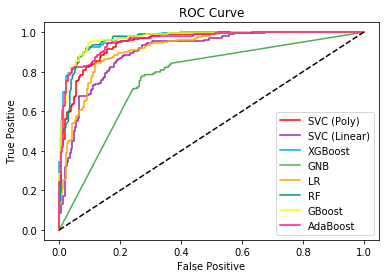

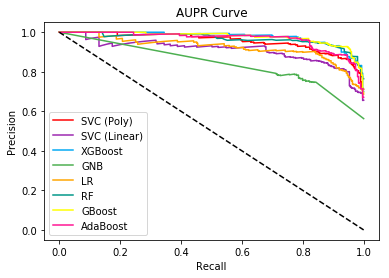

In [11]:
classifier1 = SVC (C=1.0, kernel='poly', degree=5, gamma= 0.1, probability=True)
classifier2 = SVC (C=1.0, kernel='linear', degree=5, gamma= 0.1, probability=True)                   
classifier3 = xgboost.XGBClassifier(n_estimators = 200, base_score = 0.5)
classifier4 = GaussianNB()                
classifier5 = LogisticRegression()
classifier6 = RandomForestClassifier(n_estimators=200)
classifier7 = GradientBoostingClassifier(n_estimators=200)
classifier8 = AdaBoostClassifier(n_estimators=200,learning_rate=1)

classifier_list = []
classifier_list.append(classifier1)
classifier_list.append(classifier2)
classifier_list.append(classifier3)
classifier_list.append(classifier4)
classifier_list.append(classifier5)
classifier_list.append(classifier6)
classifier_list.append(classifier7)
classifier_list.append(classifier8)

curve_fp_list = []
curve_tp_list = []
curve_precision_list = []
curve_recall_list = []

for classifier in classifier_list:
    
    print(classifier)

    skf = StratifiedKFold(n_splits=10)
    accuracies = []
    aucs       = []
    auprs      = []
    precisions = [] 
    recalls    = []
    f1s        = []
    mccs       = []
    tp_list    = [] 
    mean_fp    = np.linspace(0, 1, 100)
    y_test_avg = []
    predictions_avg = []
    count = 0
    threshold = 0.5

    print("CV Results:\n")

    for train_index, test_index in skf.split(X_train_independent, y_train_independent):

        X_train   = X_train_independent.iloc[train_index, :]
        y_train   = y_train_independent.iloc[train_index]

        X_test    = X_train_independent.iloc[test_index, :]
        y_test    = y_train_independent.iloc[test_index]

        accuracy, auc, aupr, precision, recall, f1, mcc, fp, tp, y_test, predictions = scores(classifier, X_train, X_test, y_train, y_test)

        tp_list.append(interp(mean_fp, fp, tp))
        tp_list[-1][0] = 0.0

        accuracies.append(accuracy)
        aucs.append(auc)
        auprs.append(aupr)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        mccs.append(mcc)
        y_test_avg.append(y_test)
        predictions_avg.append(predictions)
        
        count += 1
        print("CV -", count)

        final_y_test      = np.concatenate(y_test_avg)
        final_predictions = np.concatenate(predictions_avg)
        mean_tp     = np.mean(tp_list, axis=0)
        mean_tp[-1] = 1.0
        precision_pos, recall_pos, _ = precision_recall_curve(final_y_test, final_predictions)

    average_accuracy  = np.mean(accuracies)
    average_auc       = np.mean(aucs)
    average_aupr      = np.mean(auprs)
    average_precision = np.mean(precisions)
    average_recall    = np.mean(recalls)
    average_f1        = np.mean(f1s)
    average_mcc       = np.mean(mcc)

    print("Accuracy\t:", average_accuracy)
    print("AUC\t\t:", average_auc)
    print("AUPR\t\t:", average_aupr)
    print("Precision\t:", average_precision)
    print("Recall\t\t:", average_recall)
    print("F1\t\t:", average_f1)
    print("MCC\t\t:", average_mcc)
    
#     label = 'Train ROC(AUC = %.4f)' % average_auc
#     pyplot.plot(mean_fp, mean_tp, color='red', label = label, lw=1.5, alpha=1)
#     pyplot.plot([0, 1], [0, 1], color='black', linestyle = "--", lw=1.5, alpha=1)
#     pyplot.xlim([-0.05, 1.05])
#     pyplot.ylim([-0.05, 1.05])
#     pyplot.xlabel('FP')
#     pyplot.ylabel('TP')
#     pyplot.title('ROC Curve')
#     pyplot.legend(loc="lower right")
#     pyplot.show()

#     label = '(Train AUPR = %.4f)' % average_aupr
#     pyplot.plot(recall_pos, precision_pos, color='green', label = label, lw=1.5, alpha=1)
#     pyplot.plot([0, 1], [1, 0], color='black', linestyle = "--", lw=1.5, alpha=1)
#     pyplot.xlim([-0.05, 1.05])
#     pyplot.ylim([-0.05, 1.05])
#     pyplot.xlabel('Recall')
#     pyplot.ylabel('Precision')
#     pyplot.title('AUPR Curve')
#     pyplot.legend(loc="lower left")
#     pyplot.show()


    print("\nIndependent Results:\n")
    accuracy, auc, aupr, precision, recall, f1, mcc, fp, tp, y_test, predictions = independent_test_scores(classifier, X_test_independent, y_test_independent)
    precision_pos, recall_pos, _ = precision_recall_curve(y_test  , predictions)

    curve_fp_list.append(fp)
    curve_tp_list.append(tp)
    curve_precision_list.append(precision_pos)
    curve_recall_list.append(recall_pos)
    
    print("Accuracy\t:", accuracy)
    print("AUC\t\t:", auc)
    print("AUPR\t\t:", aupr)
    print("Precision\t:", precision)
    print("Recall\t\t:", recall)
    print("F1\t\t:", f1)
    print("MCC\t\t:", mcc)

    

colors = ['red', '#9c27b0', '#03a9f4', '#4caf50', 'orange', '#009688', 'yellow', '#ff1493']    
labels = ['SVC (Poly)', 'SVC (Linear)', 'XGBoost', 'GNB', 'LR', 'RF', 'GBoost', 'AdaBoost']

for i in range(len(curve_fp_list)):
    pyplot.plot(curve_fp_list[i], curve_tp_list[i], color=colors[i], label = labels[i], lw=1.5, alpha=1)
pyplot.plot([0, 1], [0, 1], color='black', linestyle = "--", lw=1.5, alpha=1)
pyplot.xlim([-0.05, 1.05])
pyplot.ylim([-0.05, 1.05])
pyplot.xlabel('False Positive')
pyplot.ylabel('True Positive')
pyplot.title('ROC Curve')
pyplot.legend(loc="lower right")
pyplot.show()

for i in range(len(curve_precision_list)):
    pyplot.plot(curve_recall_list[i], curve_precision_list[i], color=colors[i], label = labels[i], lw=1.5, alpha=1)
pyplot.plot([0, 1], [1, 0], color='black', linestyle = "--", lw=1.5, alpha=1)
pyplot.xlim([-0.05, 1.05])
pyplot.ylim([-0.05, 1.05])
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('AUPR Curve')
pyplot.legend(loc="lower left")
pyplot.show()